# **MLAH Project - Hotel Booking Analysis by Francisco** 
In this **notebook** we will be processing data from **hotel bookings** to investigate **Hotel Booking Cancellations EDA** and **Predictions**. 🙂

---



The aim is to create meaningful estimators from the data-set we have and select a model that predicts the cancellation best by comparing them with the accuracy scores of different ML models. The models include **KNN**, **Decision Tree Classifier**, **SVM** and **ANN**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML models KNN, DTC and SVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#ANN
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

#tool to represent data on map & compare models
import folium
from folium.plugins import HeatMap
import plotly.express as px
 
import warnings
warnings.filterwarnings('ignore')


## **Data Cleaning**
When looking at the dataset, we can observe some data that could potentially skew graphs and data visualization; such as NULL values, duplicates or invalid data i.e bookings with 0 adults, 0 children & 0 babies. In this segment, data clean up is performed. There are many benefits for performing this extra work:

*   Remove irrelevant observations
*   Fix structural errors
*   Filter unwanted data
*   Handle missing data (although major algorithms will not accept missing values)

At the end of the data cleaning process, you should be able to validate it by answering the next questions:


*   Does the data make sense?  
*   Does the data follow the appropriate rules for its field?
*   Does it prove your working theory?
*   Can trends patterns be found in the data?
*   If not, is that because of a data quality issue?

(Guide To Data Cleaning: Definition, Benefits, Components, And How To Clean Your Data. (2021). Tableau. https://www.tableau.com/learn/articles/what-is-data-cleaning)
















In [ ]:
#dataset is being fetched from drive but can be downloaded online - https://www.kaggle.com/jessemostipak/hotel-booking-demand/download
hotel_bookings_raw = pd.read_csv('/content/drive/MyDrive/MLAH Project/hotel_bookings.csv')

In [ ]:
hotel_bookings_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_bookings_raw.shape

(119390, 32)

In [ ]:
#eliminate duplicate rows
hotel_bookings = hotel_bookings_raw.drop_duplicates()

In [ ]:
hotel_bookings.shape

(87396, 32)

As can be seen above, by only removing duplicate rows, about 30,000 rows have been dropped.

In [ ]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
#count null values in each column
null = pd.DataFrame({'Null Values' : hotel_bookings.isna().sum()})
null

,Null Values
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#replace null values with 0 to avoid any future errors
hotel_bookings.fillna(0, inplace=True)

In [ ]:
hotel_bookings.shape

(87396, 32)

In [ ]:
#deleting rows where adults, children and babies = 0
filter = (hotel_bookings.children == 0) & (hotel_bookings.adults == 0) & (hotel_bookings.babies == 0)
hotel_bookings[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
#drop them from the dataset
hotel_bookings = hotel_bookings[~filter]
hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hotel_bookings.shape

(87230, 32)

After data clean up, we have ended up with 87,230 of data that are valid from 119,390 rows that we had previously. 

#**Exploratory Data Analysis** 
In this section of this notebook, we analyze and investigate the dataset and summarize their main characteristics, employing data visualization methods such as barcharts, linecharts, boxplots etc. The objective is also to find trends and patterns that could help us come up with scenarios and theories, by answering questions that are relevant to our investigation.


### How much do guests pay for a room per night?


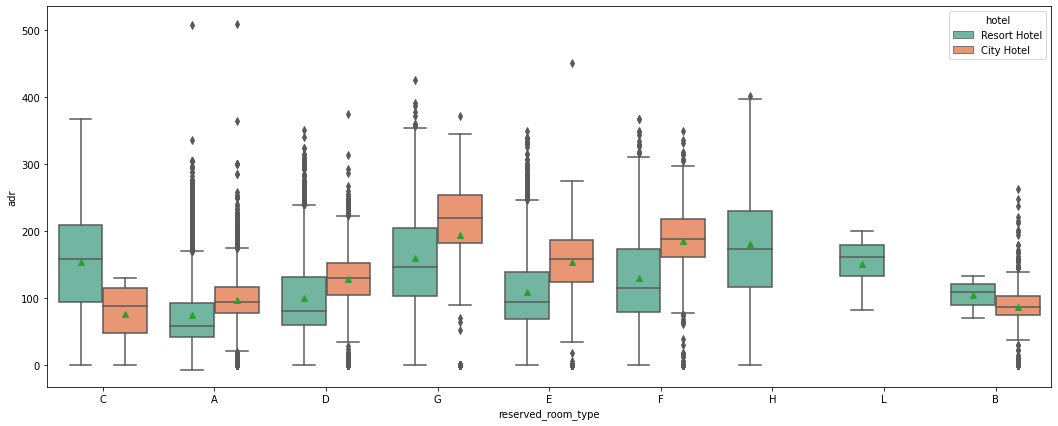

In [ ]:
#only reservations that have not been cancelled | 0 means active, 1 means canceled
data = hotel_bookings[hotel_bookings['is_canceled'] == 0]
plt.figure(figsize=(18, 7))
sns.boxplot(x="reserved_room_type", y="adr", hue="hotel", data=data, showmeans=True, palette="Set2")


We can observe how the ADR is dependant on the type of room. Room types have been representated as a code due to anonymity reasons. We can infer prices with higher ADR will be those with bigger rooms, beds or better services. i.e suites, king sized beds etc. On the other hand, room types with lower ADR may be single or double bedrooms.

Additionally, city hotels tend to be more expensive than resort hotels on average with the same room type. The reason for this could be city hotels tend to receive guests for shorter stays (work, occupation), therefore price per night increases.

**ADR = Total Room Revenue / Total Rooms Occupied**

## How does price vary over the year in city & resort hotels?

In [ ]:
#getting non-cancelled bookings from resort & city hotels
resort_data = hotel_bookings[(hotel_bookings['hotel'] == 'Resort Hotel') & (hotel_bookings['is_canceled'] == 0)]
city_data = hotel_bookings[(hotel_bookings['hotel'] == 'City Hotel') & (hotel_bookings['is_canceled'] == 0)]

In [ ]:
#average ADR per month for resort hotels
resort_hotel = resort_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,76.841664
1,August,182.103524
2,December,64.072826
3,February,53.624311
4,January,48.599615
5,July,150.914540
6,June,109.026942
7,March,57.110018
8,May,77.725129
9,November,48.956548


In [ ]:
#average ADR per month for city hotels
city_hotel = city_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,114.251636
1,August,122.825388
2,December,90.769559
3,February,88.210810
4,January,83.378062
5,July,120.069489
6,June,120.673753
7,March,91.306933
8,May,124.825944
9,November,88.271089


In [ ]:
#merge both tables into the same table for comparison
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_resort', 'price_city_hotel']
final_hotel

,month,price_resort,price_city_hotel
0,April,76.841664,114.251636
1,August,182.103524,122.825388
2,December,64.072826,90.769559
3,February,53.624311,88.210810
4,January,48.599615,83.378062
5,July,150.914540,120.069489
6,June,109.026942,120.673753
7,March,57.110018,91.306933
8,May,77.725129,124.825944
9,November,48.956548,88.271089


In [ ]:
#we can observe on the table above months are not in order, to visualise them without confusion, it is best to order it
#to help us we can install these packages
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=b26a287a7ad8ec228d13791ecbd4bee5c59014bd593aec823cbbdc40f8ab002f
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=18243f8d4e6bb5e9246514465f5362e569413bab307715661cba0941fed95662
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

final_prices = sd.Sort_Dataframeby_Month(final_hotel, 'month')
final_prices

,month,price_resort,price_city_hotel
0,January,48.599615,83.378062
1,February,53.624311,88.210810
2,March,57.110018,91.306933
3,April,76.841664,114.251636
4,May,77.725129,124.825944
5,June,109.026942,120.673753
6,July,150.914540,120.069489
7,August,182.103524,122.825388
8,September,98.855456,116.973279
9,October,62.634853,105.517410


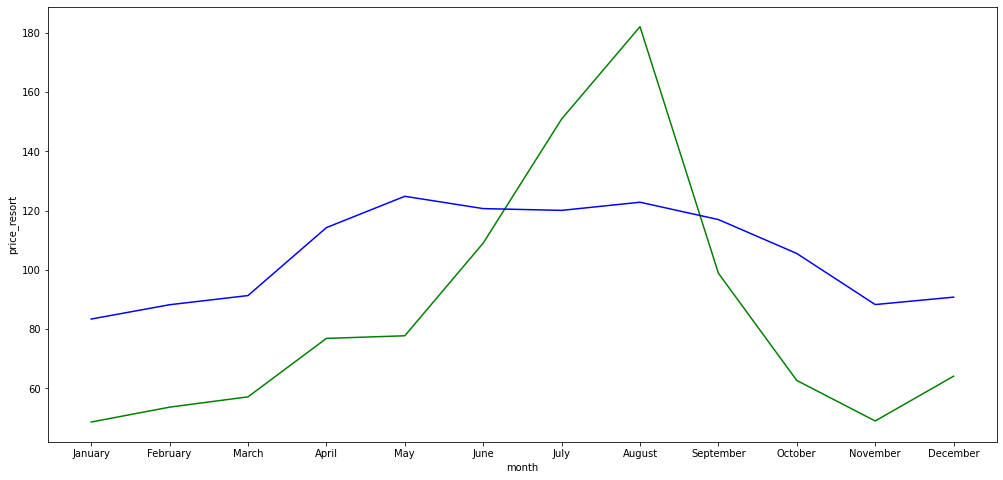

In [ ]:
#we can now plot into a linear graph
plt.figure(figsize = (17, 8))
#resort hotel green line
sns.lineplot(data=final_prices, x="month", y = 'price_resort', color='green')
#city hotel blue line
sns.lineplot(data=final_prices, x="month", y = 'price_city_hotel', color='blue')
#sns.lineplot(data=final_prices, x="month", y = , color='blue')


For **resort** hotels, we can see how **ADR** is much **higher** in **August** than even 3 months before (May). The reason for this could be resort hotels take **advantage** of this season where the **majority** of their guests are people that are on summer **vacation** and taking a **break** from work. 

##Where do guests come from?

In [ ]:
#getting non-acncelled bookings regardless if its city or hotel
country_guests = hotel_bookings[hotel_bookings['is_canceled'] == 0]['country'].value_counts().reset_index()
country_guests.columns = ['country', 'No of guests']
country_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_guests, locations = country_guests['country'],
                           color = country_guests['No of guests'], hover_name = country_guests['country'])
guests_map.show()

The map above shows number of customers that make hotel bookings per country. We can see the countries with most are Portugal, Great Britain, France, Spain and Germany. This top countries have something in common; either they are very **popular destiantions for tourism** (Portugal or Spain), or they are common countries to **seek job opportunities** that might attract people (Great Britain or Germany).

##What are the busiest months for hotels?

In [ ]:
#similar process as done previously for ADR comparison
#busiest months for resort hotels
resort_guests = resort_data['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','number of guests']
resort_guests

,month,number of guests
0,August,3153
1,July,3013
2,May,2246
3,October,2209
4,March,2191
5,April,2169
6,February,2053
7,June,1926
8,September,1875
9,November,1744


In [ ]:
city_guests = city_data['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','number of guests']
city_guests

,month,number of guests
0,August,4467
1,July,3834
2,May,3656
3,June,3477
4,March,3469
5,April,3325
6,September,3166
7,October,3070
8,February,2618
9,November,2177


In [ ]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','guests in resort','guests in city hotel']
final_guests

,month,guests in resort,guests in city hotel
0,August,3153,4467
1,July,3013,3834
2,May,2246,3656
3,October,2209,3070
4,March,2191,3469
5,April,2169,3325
6,February,2053,2618
7,June,1926,3477
8,September,1875,3166
9,November,1744,2177


In [ ]:
final_guests = sd.Sort_Dataframeby_Month(final_guests, 'month')
final_guests

,month,guests in resort,guests in city hotel
0,January,1687,1961
1,February,2053,2618
2,March,2191,3469
3,April,2169,3325
4,May,2246,3656
5,June,1926,3477
6,July,3013,3834
7,August,3153,4467
8,September,1875,3166
9,October,2209,3070


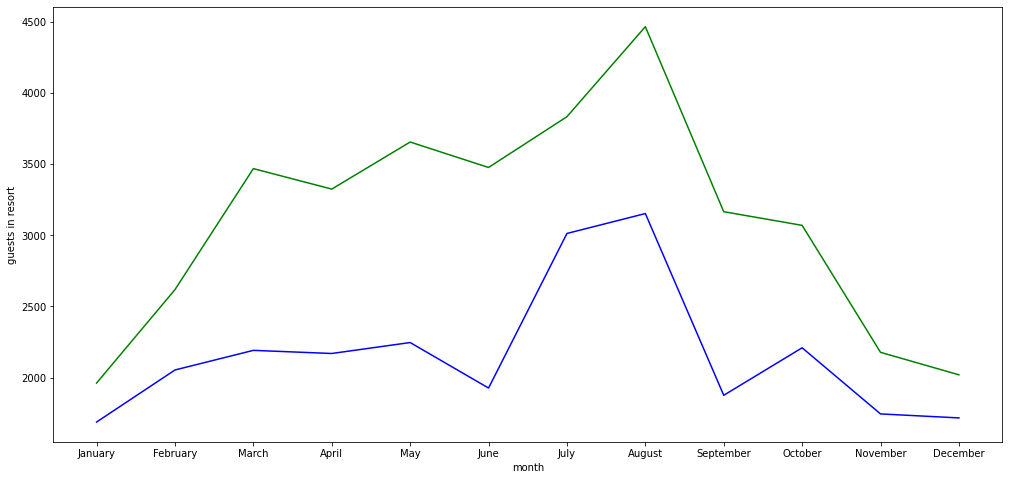

In [ ]:
#we can now plot into a linear graph
plt.figure(figsize = (17, 8))
#resort hotel green line
sns.lineplot(data=final_guests, x="month", y = 'guests in resort', color='blue')
#city hotel blue line
sns.lineplot(data=final_guests, x="month", y = 'guests in city hotel', color='green')

We can observe from this lineplot an **obvious trend** that guests tend to stay more in **summer** season rather than the winter season. The **green line** represents the number of guests in **resort** hotels and we can see a clear **spike**. Conversely, the **blue** line which represents the **city** hotel shows a more **estable** number of guests throughout the whole **year**, but also a **spike** in the summer season.

##How long do guests stay for?

In [ ]:
#droping out cancelled bookings
filter = hotel_bookings['is_canceled'] == 0
data = hotel_bookings[filter]


In [ ]:
#sum nights for week & weekends
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
#grouping total nights by type of hotel (first 2 may be an error within the dataset)
time_stayed = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
#iloc[:,rows: columns], iloc for selecting particular cells in dataset
time_stayed = time_stayed.iloc[:, :3]
time_stayed = time_stayed.rename(columns={'is_canceled':'Number of stays'})
time_stayed

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


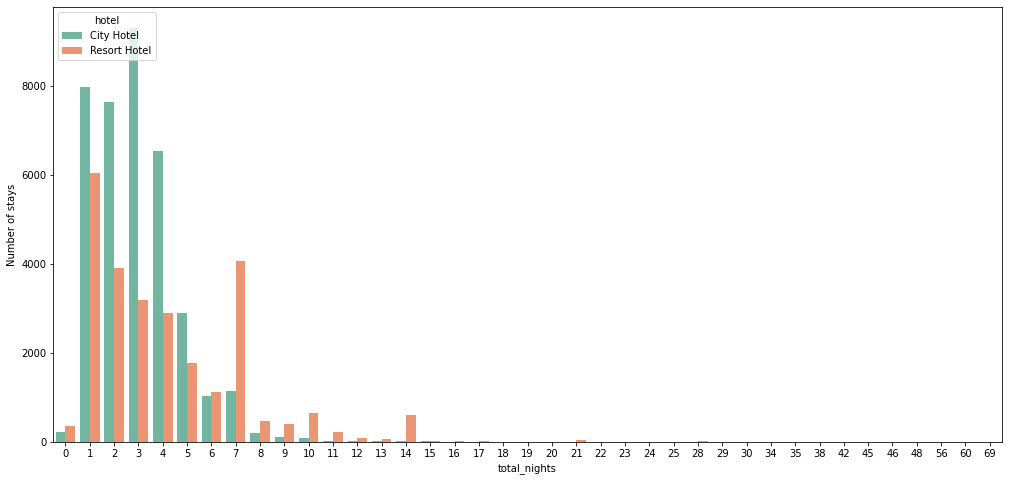

In [ ]:
plt.figure(figsize = (17, 8))
plt.xlim(0,30) #limit x-axis but doesn't work
sns.barplot(x = 'total_nights', y = 'Number of stays', hue='hotel', data=time_stayed, palette='Set2')

Guests in city hotels stay on average for ~3 nights. 
Guests in resort hotels stay for longer time than guests in city hotels. There are noticeable spikes on 7 nights and 14 nights, which could indicate guests prefer staying in week time-frames. Therefore, it can be deducted city hotels have more Transient guests as stays are on average a short amount of time.

##What type of customers are more likely to cancel their booking?

Text(0, 0.5, 'Cancelations %')

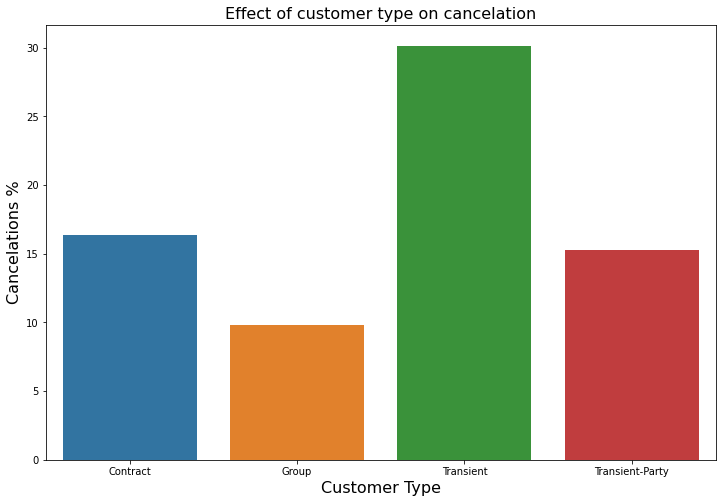

In [ ]:
# group data for lead_time with cacellation:
type_cancel_data = hotel_bookings.groupby("customer_type")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
type_cancel_data_10 = type_cancel_data.loc[type_cancel_data["count"] >= 10]

plt.figure(figsize=(12, 8))
sns.barplot(x=type_cancel_data_10.index, y=type_cancel_data_10["mean"].values * 100)
plt.title("Effect of customer type on cancelation", fontsize=16)
plt.xlabel("Customer Type", fontsize=16)
plt.ylabel("Cancelations %", fontsize=16)
#bookings are more likely canceled by Transient customers that

The definition for the customer types are:

*   Contract - when the booking has some form of contract associated to it 
*   Group – when the booking is associated to a group 
*   Transient – when the booking is not part of a group or contract, and is not associated to other transient booking 
*   Transient-party – when the booking is transient, but is associated to at least other transient booking

We can observe from this bar-chart, on average, the number on cancellations for Transient customers is double, with roughly 30% of bookings being cancelled. Other customer types like Contract and Transient-Party have a 16% cancelation rate. The least cancelled on average is Group customers, with 10% rate.





##How much lead time affects cancellation rate?


In [ ]:
# group data for lead_time: .describe() also excludes NaN values
lead_cancel_data = hotel_bookings.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,5906.0,0.058584,0.234865,0.0,0.0,0.0,0.0,1.0
1,3202.0,0.065896,0.248140,0.0,0.0,0.0,0.0,1.0
2,1923.0,0.094644,0.292798,0.0,0.0,0.0,0.0,1.0
3,1703.0,0.099824,0.299853,0.0,0.0,0.0,0.0,1.0
4,1565.0,0.097764,0.297090,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
629,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


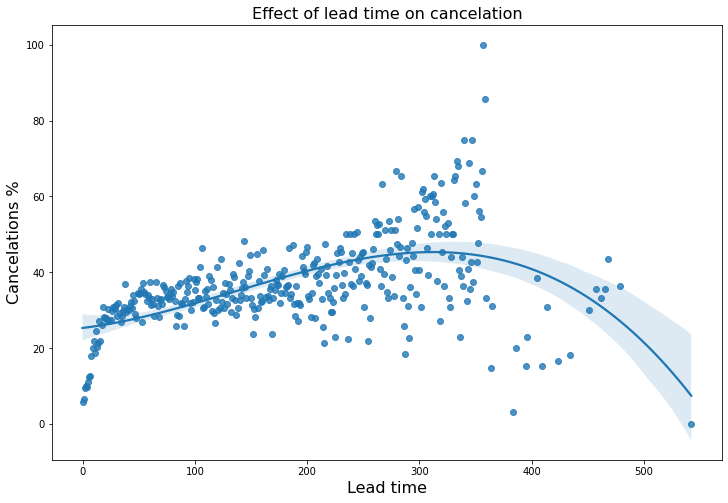

In [ ]:
# use only lead_times wih more than 10 in count for graph to get most common:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100, order=3)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations %", fontsize=16)

plt.show()
#bookings made over a year are cancelled more often that bookings closer to arrival date

This polynomial regression shows us clearly how cancelation rate is affected by the lead time. The lead time is the time elapsed between the booking date and the arrival date. The reason for this could be could be guests could have unexpected events as the arrival date is nearer, were as when lead time is greater, unexpected events are less probable of affecting cancelation.

*Unexpected event: Events that prevent guest from statying at the hotel. i.e gets sick, has a car accident etc.

##How does deposit type affect cancellation rate?

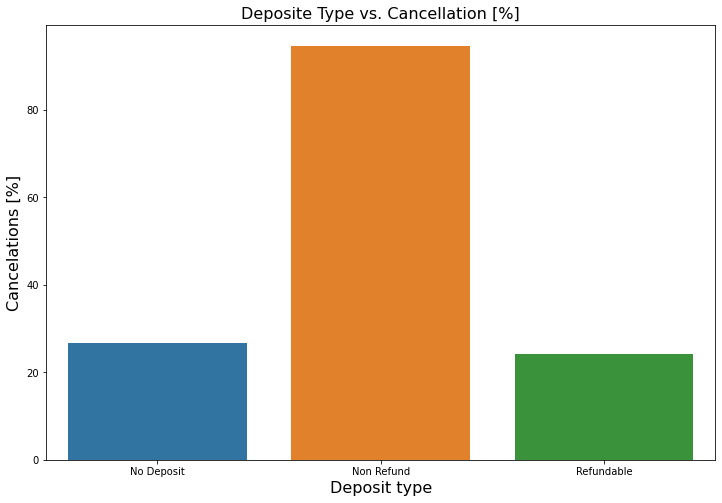

In [ ]:
# group data for deposit type & cancelled bookings:
deposit_data = hotel_bookings.groupby("deposit_type")["is_canceled"].describe()

plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_data.index, y=deposit_data["mean"] * 100)
plt.title("Deposite Type vs. Cancellation [%]", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

This bar-chart can be **contradictory** as it demostrates that bookings with a 'non-refund' deposit tend to be more cancelled. By using logic, it could be assumed before-hand refundable bookings would tend to be more cancelled as the customer wouldn't be affected. This could either be an error within the dataset or there is missing information.

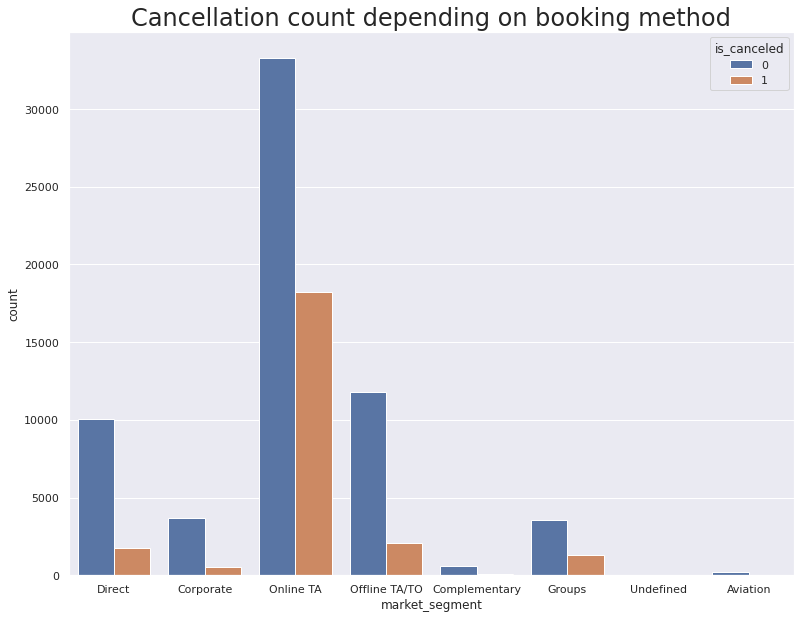

In [ ]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Cancellation count depending on booking method", fontdict = {'fontsize':24})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = hotel_bookings)
#market_segment = booking method i.e travel agency, direct, group etc.
#Cancelled booking means 'is_canceled' = 1

We can evaluate here what sort of booking methods tend to be more cancelled. We can now perform some calculations in order to get more information.

*   Online Travel Agency has a cancellation rate over 50% 
*   Direct has roughly 20% cancellation rate
*   Offline Travel Agents/Tour Operators has a 15% cancellation rate
*   Group cacellation rate is also high with 35%

It surprises me the amount of cancellations that take place in a online TA, this could be due to the type of deposit for these booking methods are 'refund' so the money is refunded to its whole to the customer.





# Data Pre-processing and Predictions



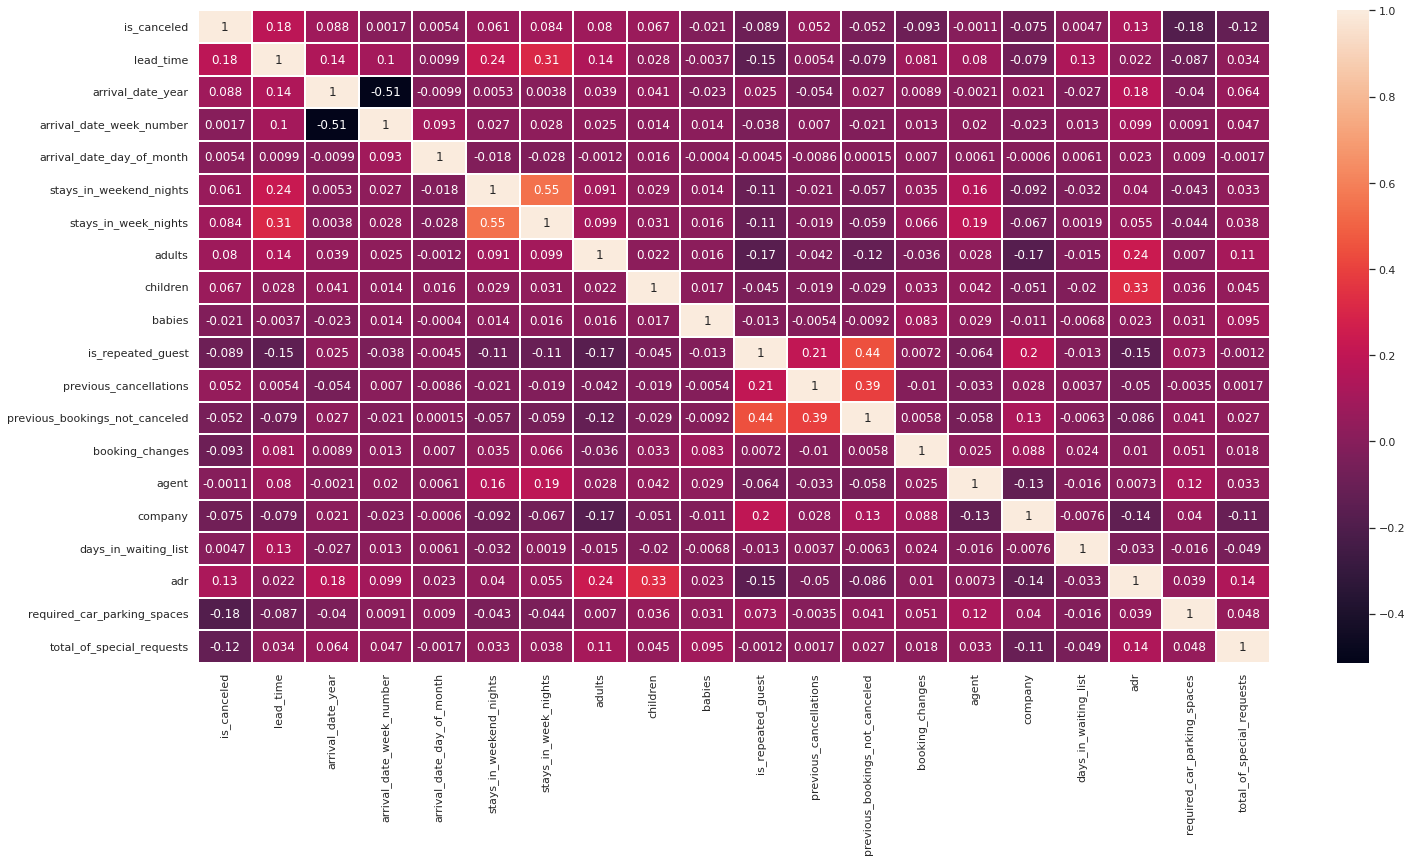

In [ ]:
#here we can understand the relationships between 2 variables and depict any patterns
plt.figure(figsize = (24, 12))

corr = hotel_bookings.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
#what correlation is there with cancelled bookings?
correlation = hotel_bookings.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.184515
required_car_parking_spaces       0.184456
adr                               0.127233
total_of_special_requests         0.120794
booking_changes                   0.093236
is_repeated_guest                 0.088764
arrival_date_year                 0.088020
stays_in_week_nights              0.084159
adults                            0.080271
company                           0.075314
children                          0.067182
stays_in_weekend_nights           0.060992
previous_bookings_not_canceled    0.052178
previous_cancellations            0.051501
babies                            0.020627
arrival_date_day_of_month         0.005449
days_in_waiting_list              0.004710
arrival_date_week_number          0.001691
agent                             0.001145
Name: is_canceled, dtype: float64

In [ ]:
# here we pick useless columns that wont affect the training of the models

useless_columns = ['arrival_date_year', 'arrival_date_year', 'days_in_waiting_list',  'assigned_room_type', 'booking_changes',
               'reservation_status', 'country']

hotel_bookings.drop(useless_columns, axis = 1, inplace = True)

In [ ]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,A,No Deposit,0.0,0.0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,A,No Deposit,304.0,0.0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,No Deposit,240.0,0.0,Transient,98.0,0,1,2015-07-03


In [ ]:
#getting columns that do not hold a numerical value (e.g. customer-type), these are the ones we use to predict numerical columns
category_columns = [col for col in hotel_bookings.columns if hotel_bookings[col].dtype == 'O']
category_columns

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
category_hotel_bookings = hotel_bookings[category_columns]
category_hotel_bookings.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [ ]:
#split reservation status date into 3 separate columns (year, month and day)
category_hotel_bookings['reservation_status_date'] = pd.to_datetime(category_hotel_bookings['reservation_status_date'])

category_hotel_bookings['year'] = category_hotel_bookings['reservation_status_date'].dt.year
category_hotel_bookings['month'] = category_hotel_bookings['reservation_status_date'].dt.month
category_hotel_bookings['day'] = category_hotel_bookings['reservation_status_date'].dt.day

In [ ]:
#after this conversion, old columns are dropped
category_hotel_bookings.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [ ]:
category_hotel_bookings.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [ ]:
# printing unique values of each column
for column in category_hotel_bookings.columns:
    print(f"{column} --> {category_hotel_bookings[column].unique()}\n")

hotel --> ['Resort Hotel' 'City Hotel']

meal --> ['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment --> ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel --> ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type --> ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type --> ['No Deposit' 'Refundable' 'Non Refund']

customer_type --> ['Transient' 'Contract' 'Transient-Party' 'Group']

year --> [2015 2014 2016 2017]

month --> [ 7  5  4  6  3  8  9  1 11 10 12  2]

day --> [ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [ ]:
# encoding attributes to numerical values

category_hotel_bookings['hotel'] = category_hotel_bookings['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

category_hotel_bookings['meal'] = category_hotel_bookings['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

category_hotel_bookings['market_segment'] = category_hotel_bookings['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

category_hotel_bookings['distribution_channel'] = category_hotel_bookings['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

category_hotel_bookings['reserved_room_type'] = category_hotel_bookings['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

category_hotel_bookings['deposit_type'] = category_hotel_bookings['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

category_hotel_bookings['customer_type'] = category_hotel_bookings['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
#dataset recording is only between 2015 & 2017
category_hotel_bookings['year'] = category_hotel_bookings['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [ ]:
category_hotel_bookings.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [ ]:
# already numerical attributes such as lead_time do not have to be encoded
numerical_hotel_bookings = hotel_bookings.drop(columns = category_columns, axis = 1)
numerical_hotel_bookings.drop('is_canceled', axis = 1, inplace = True)
numerical_hotel_bookings

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [ ]:
numerical_hotel_bookings.var()

lead_time                          7406.096949
arrival_date_week_number            186.847457
arrival_date_day_of_month            78.066862
stays_in_weekend_nights               1.055568
stays_in_week_nights                  4.160908
adults                                0.386541
children                              0.208178
babies                                0.012929
is_repeated_guest                     0.037078
previous_cancellations                0.136415
previous_bookings_not_canceled        3.003405
agent                             12094.996676
company                            2911.322006
adr                                3013.046794
required_car_parking_spaces           0.079332
total_of_special_requests             0.692309
dtype: float64

In [ ]:
# normalizing numerical variables

numerical_hotel_bookings['lead_time'] = np.log(numerical_hotel_bookings['lead_time'] + 1)
numerical_hotel_bookings['arrival_date_week_number'] = np.log(numerical_hotel_bookings['arrival_date_week_number'] + 1)
numerical_hotel_bookings['arrival_date_day_of_month'] = np.log(numerical_hotel_bookings['arrival_date_day_of_month'] + 1)
numerical_hotel_bookings['agent'] = np.log(numerical_hotel_bookings['agent'] + 1)
numerical_hotel_bookings['company'] = np.log(numerical_hotel_bookings['company'] + 1)
numerical_hotel_bookings['adr'] = np.log(numerical_hotel_bookings['adr'] + 1)

In [ ]:
numerical_hotel_bookings.var()

lead_time                         2.647499
arrival_date_week_number          0.457121
arrival_date_day_of_month         0.513563
stays_in_weekend_nights           1.055568
stays_in_week_nights              4.160908
adults                            0.386541
children                          0.208178
babies                            0.012929
is_repeated_guest                 0.037078
previous_cancellations            0.136415
previous_bookings_not_canceled    3.003405
agent                             3.489771
company                           1.396759
adr                               0.618808
required_car_parking_spaces       0.079332
total_of_special_requests         0.692309
dtype: float64

In [ ]:
#replacing NULL values that could affect training
numerical_hotel_bookings['adr'] = numerical_hotel_bookings['adr'].fillna(value = numerical_hotel_bookings['adr'].mean())

In [ ]:
numerical_hotel_bookings.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1


In [ ]:
#merging both tables into one single table, X-axis is our categorical + numerical variables, Y-axis is our 'is-canceled' variable
X = pd.concat([category_hotel_bookings, numerical_hotel_bookings], axis = 1)
y = hotel_bookings['is_canceled']

In [ ]:
X.shape, y.shape

((87230, 26), (87230,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
80180,1,0,2,2,1,0,1,0,11,13,...,0.0,0,0,0,0,2.302585,0.0,4.672829,1,1
17938,0,2,2,2,1,0,0,0,10,28,...,0.0,0,0,0,0,5.484797,0.0,4.361824,0,2
87333,1,0,2,2,4,0,0,2,4,18,...,0.0,0,0,0,0,2.079442,0.0,5.318218,0,2
54215,1,0,2,2,2,0,0,2,4,28,...,0.0,0,0,0,0,2.302585,0.0,4.858261,0,0
50114,1,3,2,2,1,0,0,2,3,18,...,0.0,0,0,0,0,2.302585,0.0,4.444414,0,1


In [ ]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
39891,0,2,2,2,1,0,2,3,8,31,...,0.0,0,0,0,0,5.484797,0.0,5.407172,0,3
115172,1,3,2,2,1,0,0,3,7,3,...,0.0,0,0,0,0,5.030438,0.0,4.485711,0,0
111247,1,0,2,2,1,0,0,3,5,8,...,0.0,0,0,0,0,2.079442,0.0,4.511848,0,1
62344,1,0,2,2,1,0,0,2,12,19,...,0.0,0,0,0,0,2.302585,0.0,4.505350,0,0
60710,1,3,2,2,1,0,0,2,11,2,...,0.0,0,0,0,0,2.302585,0.0,4.527209,0,0


In [ ]:
y_train.head(), y_test.head()

(80180    0
 17938    0
 87333    0
 54215    1
 50114    1
 Name: is_canceled, dtype: int64, 39891     0
 115172    0
 111247    0
 62344     1
 60710     1
 Name: is_canceled, dtype: int64)

##KNN Classification Algorithm
K-Nearest Neighbor is one of the most common classification algorithms used in ML. It is categorised as Supervised Learning and it is used for both classification and regression. It works by finding the nearest distances between a query and all the samples. From the training we can see we have a achieved an **85.3% accuracy**.


(Patwardhan, S. (2021, April 21). KNN Algorithm https://www.analyticsvidhya.com/blog/2021/04/simple-understanding-and-implementation-of-knn-algorithm/#:%7E:text=K%20Nearest%20Neighbor%20algorithm%20falls,missing%20values%20and%20resampling%20datasets.)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

#acc_knn = accuracy 
#conf = confusion matrix ---> [[True Postitive, False Positive]
#                              [False Negative, True Negative]
#clf_report = classification report
acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8526882953112461
Confusion Matrix : 
[[18327   727]
 [ 3128  3987]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     19054
           1       0.85      0.56      0.67      7115

    accuracy                           0.85     26169
   macro avg       0.85      0.76      0.79     26169
weighted avg       0.85      0.85      0.84     26169



##Decision Tree Classifier Algorithm
A DTC creates the classification model building a decision tree. It also belongs to the family of supervised learning algorithms like KNN. It works by spliting data according to certain parameters. It is composed by Nodes (Input Value), Edges (Outcome of Input and connects with the next node) and Leaf Nodes(Nodes that predict the outcome). As shown below, a **92.8% accuracy** score is achieved from the training.

Chakure, A. (2022, February 10). Decision Tree Classification - The Startup. 
Medium.

https://medium.com/swlh/decision-tree-classification-de64fc4d5aac


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9277007145859605
Confusion Matrix : 
[[18133   921]
 [  971  6144]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19054
           1       0.87      0.86      0.87      7115

    accuracy                           0.93     26169
   macro avg       0.91      0.91      0.91     26169
weighted avg       0.93      0.93      0.93     26169



##Support Vector Machine
Support Vector Classifier works by creating a 'hyperplane', which is a line that splits up two variables in a graph. This line is known as a decision boundary. Anything left to the line will be classified as one thing, and anything to the right is classified another. In this case, accuracy score was **84.3%**, which is less than expected.

Support Vector Machines (SVM) Algorithm Explained. (2017, June 22). MonkeyLearn Blog. https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/#:%7E:text=How%20Does%20SVM%20Work%3F,-The%20basics%20of&text=A%20support%20vector%20machine%20takes,to%20the%20other%20as%20red.

In [ ]:
#could take more than expected, so split into different cells (2-3 minutes)
svc = SVC()
svc.fit(X_train, y_train)


    


SVC()

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
acc_svc = accuracy_score(y_test, y_pred_svc)
conf = confusion_matrix(y_test, y_pred_svc)
clf_report = classification_report(y_test, y_pred_svc)

print(f"Accuracy Score of SVM is : {acc_svc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of SVM is : 0.8430585807634988
Confusion Matrix : 
[[18890   164]
 [ 3943  3172]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     19054
           1       0.95      0.45      0.61      7115

    accuracy                           0.84     26169
   macro avg       0.89      0.72      0.75     26169
weighted avg       0.86      0.84      0.82     26169



#ANN Classification Algorithm
ANN si another supervised classification algorithm. It is actually inspired by how the human neurons work. The architecture of a ANN primarily consists of 3 layers: Input layer, Hidden layers and the Output layer. There can be any number of hidden layers to training, but it is not always more means better. In this case, **98.1%** accuracy score was achieved, which is the highest of the 3 classification algorithms previously trained.

In [ ]:
#joining both dataframes, category and numerical
X = pd.concat([category_hotel_bookings, numerical_hotel_bookings], axis = 1)
y = to_categorical(hotel_bookings['is_canceled'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.shape

(61061, 26)

In [ ]:
ANN_model  = keras.models.Sequential()
ANN_model.add(keras.layers.Dense(200, activation = 'relu', input_shape = (26, )))
ANN_model.add(keras.layers.Dense(100, activation = 'relu'))
ANN_model.add(keras.layers.Dense(2, activation = 'sigmoid'))

In [ ]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               5400      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 25,702
Trainable params: 25,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ANN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#ANN_model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])


In [ ]:
history = ANN_model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 10)

Epoch 1/10
1909/1909 [==============================] - 12s 5ms/step - loss: 0.3861 - accuracy: 0.8398 - val_loss: 0.2591 - val_accuracy: 0.9130
Epoch 2/10
1909/1909 [==============================] - 9s 5ms/step - loss: 0.2022 - accuracy: 0.9323 - val_loss: 0.1669 - val_accuracy: 0.9428
Epoch 3/10
1909/1909 [==============================] - 9s 5ms/step - loss: 0.1469 - accuracy: 0.9524 - val_loss: 0.1175 - val_accuracy: 0.9600
Epoch 4/10
1909/1909 [==============================] - 10s 5ms/step - loss: 0.1201 - accuracy: 0.9618 - val_loss: 0.0975 - val_accuracy: 0.9675
Epoch 5/10
1909/1909 [==============================] - 10s 5ms/step - loss: 0.1014 - accuracy: 0.9675 - val_loss: 0.0829 - val_accuracy: 0.9764
Epoch 6/10
1909/1909 [==============================] - 9s 4ms/step - loss: 0.0938 - accuracy: 0.9705 - val_loss: 0.0791 - val_accuracy: 0.9741
Epoch 7/10
1909/1909 [==============================] - 9s 5ms/step - loss: 0.0811 - accuracy: 0.9749 - val_loss: 0.0697 - val_accura

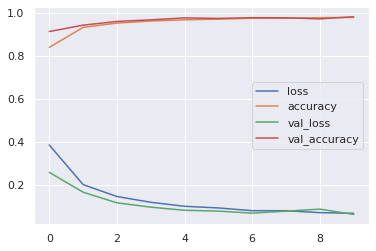

In [ ]:
dataframe = pd.DataFrame(history.history)
dataframe.plot()

In [ ]:
#accuracy ann
acc_ann = ANN_model.evaluate(X_test, y_test)[1]

print(f'Accuracy of ANN model is {acc_ann}')

818/818 [==============================] - 2s 3ms/step - loss: 0.0637 - accuracy: 0.9818
Accuracy of ANN model is 0.9818105101585388


## Results
Here we assess and compare the models we have used.

In [ ]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Decision Tree Classifier','SVM','ANN'],
    'Score' : [acc_knn, acc_dtc, acc_svc, acc_ann]
})

models.sort_values(by="Score")


,Model,Score
2,SVM,0.843059
0,KNN,0.852688
1,Decision Tree Classifier,0.927701
3,ANN,0.981811


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_white', title = 'ML Classifier Comparison')

#Conclusion
After getting all of the accuracy scores, we can see how ANN has the best accuracy score which means in this case it would be the most effective model to use for prediction.

Other models such as KNN and DTC, given their algortihms are very similar, they still give a very different accuracy score. DTC has much greater accuracy score.

Finally, SVM has given the worst accuracy score, although it is still high and could in theory be used for prediction. In other case, it is better to use another classification algortihm.



**Francisco Perez - Sheffield Hallam University**